### Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

### Reading the training and testing dataset

In [65]:
train = pd.read_csv('train_tweet.csv')
#test = pd.read_csv('test_tweets.csv')

print(train.shape)
# print(test.shape)

(25499, 3)


Clean invalid characters

In [66]:
train['tweet'] = train['tweet'].str.replace("@user", "") # remove @user
train['tweet'] = train['tweet'].str.replace("&amp", "") # remove @user
train['tweet'] = train['tweet'].str.replace("[^A-z\s@#]", "", regex=True) # remove invalid characters

In [70]:
train, test = sklearn.model_selection.train_test_split(train, test_size=0.2)
print(train.shape)
print(test.shape)

(16319, 3)
(4080, 3)


In [71]:
train.head()

,id,label,tweet
9320,9321,0,finding dory
13775,13776,0,a busy day for our chefs in the pastry kitch...
6831,6832,0,erin_swallows #busty
14372,14373,0,days until season premier i cant wait #th...
17350,17351,0,so you know youre hormonal when you cry over l...


In [72]:
test.head()

,id,label,tweet
17452,17453,0,trump is just a weak nasty feminist cunt no go...
2948,2949,0,days until im kelowna bound to scout out our ...
12204,12205,0,im gonna sit on a diet till i weigh #me #fas...
16640,16641,0,so if you saw my last video you know i am st...
2128,2129,0,[] update @ #social #analytics #igers #secu...


In [73]:
train.isnull().any()
test.isnull().any()

id       False
label    False
tweet    False
dtype: bool

### Checking out the negative comments from the train set

In [74]:
train[train['label'] == 0].head(10)

,id,label,tweet
9320,9321,0,finding dory
13775,13776,0,a busy day for our chefs in the pastry kitch...
6831,6832,0,erin_swallows #busty
14372,14373,0,days until season premier i cant wait #th...
17350,17351,0,so you know youre hormonal when you cry over l...
6778,6779,0,#writing #editing me how about you what flo...
13905,13906,0,proven #habits that people have
16440,16441,0,in the competition #music #amazing
4199,4200,0,little trip for a bihday dinner #bus #travell...
23561,23562,0,unending #hours in #montreal


### Checking out the postive comments from the train set 

In [75]:
train[train['label'] == 1].head(10)

,id,label,tweet
20675,20676,1,f this government that deliberately toures ...
22272,22273,1,youre running out of #hater bitches to #white...
14496,14497,1,#realitycheck #policing in #america from a cop...
17016,17017,1,this should have been enough just say no #not...
23450,23451,1,#scrutinize #savor #dispose #unbelievable #ch...
6021,6022,1,in #trumpsamerica #feeling #empowerd #fowoh...
24570,24571,1,arise sir mo farah this is my country you #is...
5164,5165,1,greek girls having ana sex black girl porn
24201,24202,1,you #hispanic feel like the are stomping on...
9519,9520,1,confessions of former neo#confederate #audib...


### Checking the distribution of tweets in the data

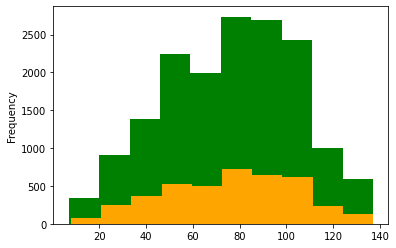

In [77]:
length_train = train['tweet'].str.len().plot.hist(color = 'green', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

### Adding a column to represent the length of the tweet

In [78]:
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
9320,9321,0,finding dory,15
13775,13776,0,a busy day for our chefs in the pastry kitch...,94
6831,6832,0,erin_swallows #busty,25
14372,14373,0,days until season premier i cant wait #th...,54
17350,17351,0,so you know youre hormonal when you cry over l...,120
6778,6779,0,#writing #editing me how about you what flo...,59
13905,13906,0,proven #habits that people have,35
16440,16441,0,in the competition #music #amazing,38
4199,4200,0,little trip for a bihday dinner #bus #travell...,88
23561,23562,0,unending #hours in #montreal,33


In [79]:
train.groupby('label').describe()

id                                                              \
         count          mean          std   min     25%      50%       75%   
label                                                                        
0      15145.0  12669.441202  7365.015520   2.0  6281.0  12627.0  19033.00   
1       1174.0  12758.986371  7408.457417  15.0  6382.5  12650.5  19290.25   

                    len                                                       
           max    count       mean        std  min   25%   50%    75%    max  
label                                                                         
0      25499.0  15145.0  75.206537  28.208652  7.0  53.0  78.0   96.0  137.0  
1      25495.0   1174.0  80.803237  25.628195  9.0  61.0  85.0  102.0  131.0

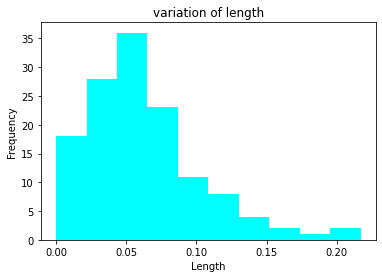

In [15]:
train.groupby('len').mean()['label'].plot.hist(color = 'cyan', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0, 0.5, 'Frequency')

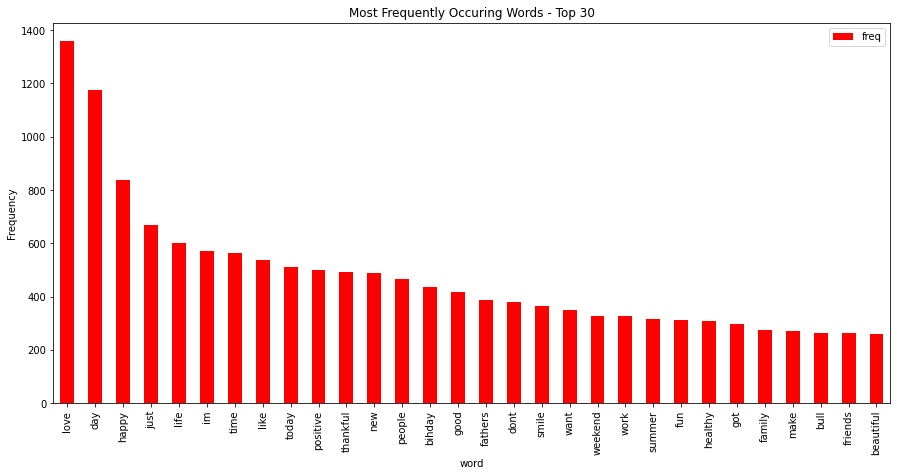

In [80]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.title("Most Frequently Occuring Words - Top 30")
plt.ylabel('Frequency')

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

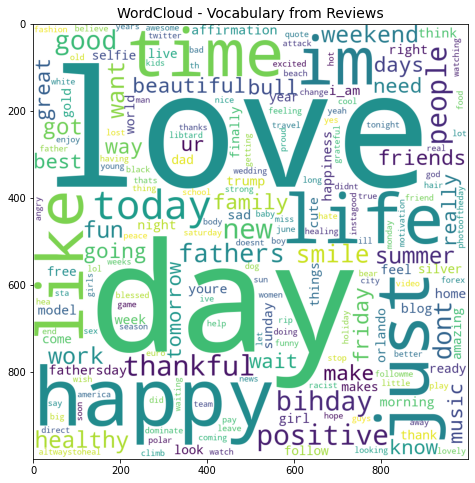

In [81]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 14)

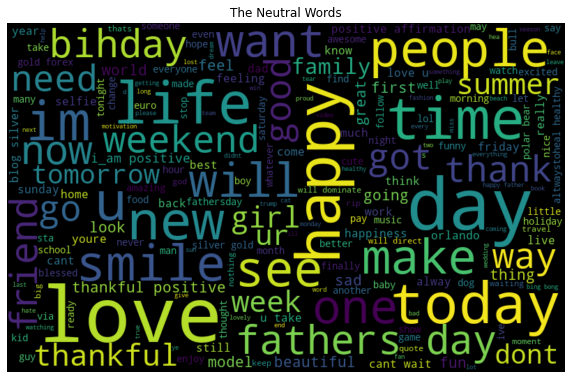

In [82]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

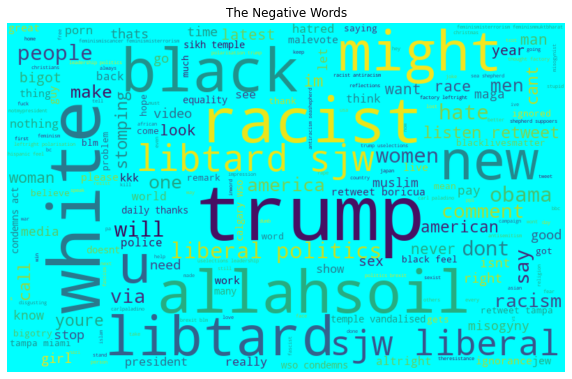

In [83]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [68]:
word_scores = {}
for x in train.index:
    sentiment = train['label'][x]
    words = train['tweet'][x].split(" ")
    for word in words:
        if word not in word_scores:
            word_scores[word] = (1 if sentiment == "0" else -1)
        word_scores[word] += (1 if sentiment == "0" else -1)
    



In [69]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

score_df = train.copy()
col_neg = []
col_pos = []
for i in train.iterrows():
    label = i[1].label
    tweet = i[1].tweet
    tweetparts = tweet.split(" ")
    scores = {}
    for part in tweetparts:
        if part != "" or part != " ":
            scores[part] = word_scores[part]
    sorted_scores = sorted(scores.items(), key=lambda x:x[1])
    word_list = [x[0] for x in sorted_scores if not x[0] in set(stopwords.words('english'))]
    col_neg.append(word_list[:5]) # sort words from most negative to least negative
    col_pos.append(word_list[::-1][:3]) # reverse

score_df['neg_words'] = col_neg
score_df['pos_words'] = col_pos





In [63]:
score_df[score_df['label'] == 1].drop(['pos_words'], axis=1).head(20) #.sort_values(by='len',ascending=False

,id,label,tweet,len,neg_words
19234,19235,1,the main stream news media like was busily c...,89,"[, like, news, media, small]"
8004,8005,1,more americans hate him,27,"[, hate, americans]"
1366,1367,1,because we have been #shuckinandjivin for t...,88,"[, want, vote, #democraticpay, #shuckinandjivin]"
12947,12948,1,book enduring conviction fred korematsu amp h...,85,"[, amp, book, ht, #justice]"
1709,1710,1,hope to see you at the show #feminist #repro...,72,"[, see, show, hope, #feminist]"
21440,21441,1,scapelliti woobietuesday when youre blocked b...,103,"[, amp, youre, blocked, #blacklivesmatter]"
2023,2024,1,people of colour do not enjoy equality within...,106,"[, people, enjoy, group, within]"
22236,22237,1,relied on #bankruptcy protection to keep his...,91,"[, keep, used, ego, protection]"
22146,22147,1,obama has been the most destructive president...,118,"[, amp, obama, history, president]"
1400,1401,1,pay of #rich #white #snobs via #tcot #tpc,45,"[, via, pay, #white, #tcot]"


In [55]:
(score_df[score_df['label'] == 0].drop(['neg_words'], axis=1))

,id,label,tweet,len,pos_words
16084,16085,0,it actually feels like christmas day #euro,46,"[christmas, feels, actually]"
6031,6032,0,#tips to attract #good #positive energy via ...,56,"[attract, #tips, energy]"
14490,14491,0,three days to go were super,30,"[three, super, days]"
7272,7273,0,#instaaoftheday buffalo simulation buffalo f...,105,"[#instaaoftheday, thi, vicinity]"
16612,16613,0,be #thankful in #all circumstances #good or #b...,86,"[backwoods, anniejojogreer, circumstances]"
...,...,...,...,...,...
8848,8849,0,come on come on turn the radio on its friday n...,124,"[radio, makeup, gotta]"
2265,2266,0,detroit may have had stronger claim on red win...,100,"[orr, kevyn, revenue]"
8956,8957,0,music of hope dramatic thoughtful music #guita...,109,"[thoughtful, dramatic, #background]"
14249,14250,0,my #look yesterday mi look de ayer #familyt...,77,"[#gerona, #girona, #familytrip]"


### Collecting the hashtags

In [38]:
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [21]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

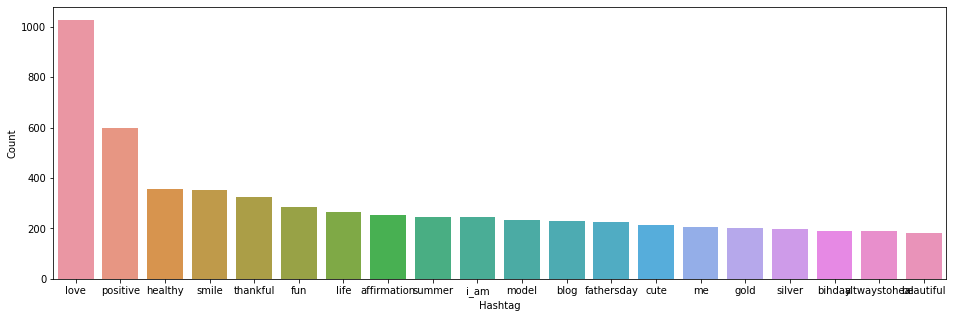

In [22]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

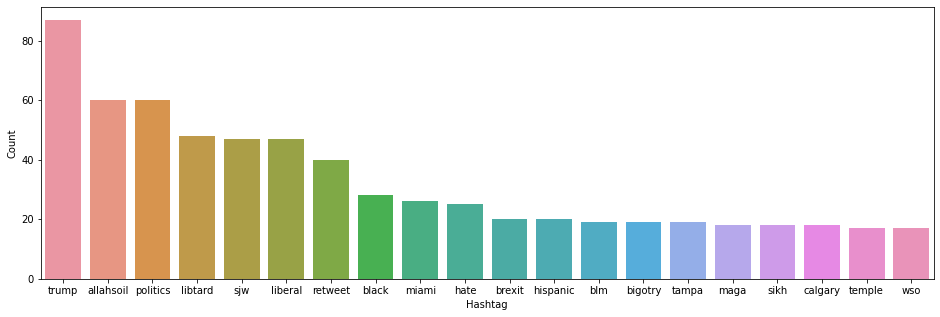

In [23]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [24]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(3687891, 4905920)

In [25]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6897822022438049),
 ('#hull', 0.6260421872138977),
 ('rocket', 0.6152682304382324),
 ('newcastle', 0.6054762601852417),
 ('#travelling', 0.6017155647277832),
 ('baked', 0.5984527468681335),
 ('bestie', 0.5901951193809509),
 ('#newblood', 0.5875235199928284),
 ('spa', 0.5873470306396484),
 ('teaching', 0.5859014987945557)]

In [26]:
model_w2v.wv.most_similar(positive = "cancer")

[('roughly', 0.6802306771278381),
 ('disrespect', 0.6790425777435303),
 ('effect', 0.6742862462997437),
 ('ownership', 0.6726503968238831),
 ('heabreak', 0.6721108555793762),
 ('#guncrime', 0.6711512804031372),
 ('inactivity', 0.6704533100128174),
 ('fck', 0.6668516397476196),
 ('renowned', 0.6642996072769165),
 ('harassment', 0.6629223227500916)]

In [27]:
model_w2v.wv.most_similar(positive = "apple")

[('mytraining', 0.7137197852134705),
 ('known', 0.6285503506660461),
 ('disappeared', 0.5914577841758728),
 ('ta', 0.5892800092697144),
 ('dominos', 0.5888776779174805),
 ('recipe', 0.5882474780082703),
 ('farright', 0.567657470703125),
 ('coupon', 0.5609545111656189),
 ('#appleta', 0.5601176023483276),
 ('wading', 0.5529349446296692)]

In [28]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [29]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['sad', 'this', 'is', 'the', 'first', 'of', 'possibly', 'many', 'more', 'to', 'come', '#extinction'], tags=['tweet_21216']),
 TaggedDocument(words=['#coffee', 'keeps', 'our', 'team', 'amp', 'on', 'the', 'go', 'allen', 'ed', 'thanks', 'damaris'], tags=['tweet_2563']),
 TaggedDocument(words=['just', 'my', 'focking', 'luck', 'whos', 'croatian', 'your', 'havin', 'sone'], tags=['tweet_18427']),
 TaggedDocument(words=['regram', 'its', 'the', '#weekend', 'im', 'such', 'a', '#girl', 'i', 'got', 'lots', 'of', 'sleep', 'hung', 'out', 'with'], tags=['tweet_5052']),
 TaggedDocument(words=['my', 'baby', 'girl', 'is', 'sleeping', 'by', 'herself', 'tonight', 'i', 'might', 'go', 'get', 'her', 'from', 'her', 'room', 'lol', '#missmycuddlebuddy'], tags=['tweet_1225']),
 TaggedDocument(words=['upload', 'upload', 'uploadddddd'], tags=['tweet_1924'])]

### Removing unwanted patterns from the data

In [30]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roydl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
train_corpus = []


# for i in range(0, 25499):
for i in train['tweet'].index:
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [32]:
test_corpus = []

# for i in range(0, 17197):
for i in test['tweet'].index:
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

### Creating bag of words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(20399, 2500)
(20399,)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(5100, 2500)


### Splitting the training data into train and valid sets

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(15299, 2500)
(5100, 2500)
(15299,)
(5100,)


### Standardization

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier(n_jobs=-1)
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9990849075102948
Validation Accuracy : 0.9605882352941176
F1 score : 0.6442477876106195
[[4717   75]
 [ 126  182]]


### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9956206287992679
Validation Accuracy : 0.9262745098039216
f1 score : 0.5240506329113923
[[4517  275]
 [ 101  207]]


### Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(n_jobs=-1)
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

: 

### SVM

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [ ]:
!pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### XGBOOST

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_jobs=-1)
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9607052144031077
Validation Accuracy : 0.9542908357606991
f1 score : 0.5363636363636364
[[4141   18]
 [ 186  118]]
